In [1]:
from IPython.core.display import HTML
with open('../style.css', 'r') as file:
    style = file.read()
HTML(style)

# Handwritten Digit Recognition

This notebook has been adapted from the article
[Handwritten Digit Recognition Using PyTorch — Intro To Neural Networks](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
by [Amitrajit Bose](https://medium.com/@amitrajit_bose).

We begin by importing both `torch` and `torchvision`.

In [2]:
import torch

### Download The Dataset & Define The Transforms

In [3]:
from torchvision import datasets, transforms

Next, we define a *transformer* to normalize the data.
* First, our transformer transforms the data into a tensor.
* Then this tensor is normalized so that both the mean and the variance of the data is `0.5`.

In [4]:
transformer = transforms.Compose([transforms.ToTensor(),
                                  transforms.Normalize((0.5,), (0.5,)),
                                ])

In [5]:
# Download and load the training data
trainset = datasets.MNIST('Data/', download=True, train=True,  transform=transformer)
valset   = datasets.MNIST('Data/', download=True, train=False, transform=transformer)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader   = torch.utils.data.DataLoader(valset,   batch_size=64, shuffle=True)

### Exploring The Data

We get the first batch of images together with its labels.

In [6]:
dataiter = iter(trainloader)

In [7]:
images, labels = dataiter.__next__()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


We use the library `matplotlib` to plot the first image from this batch.

In [8]:
import matplotlib.pyplot as plt

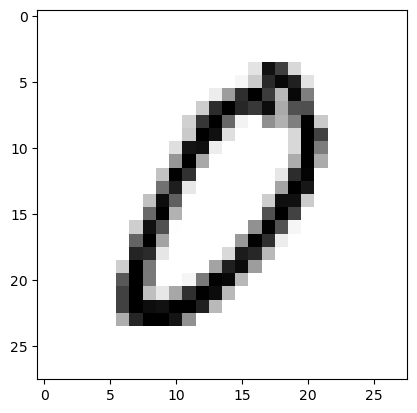

In [9]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [10]:
labels[0].item()

0

Next, we plot 60 images.

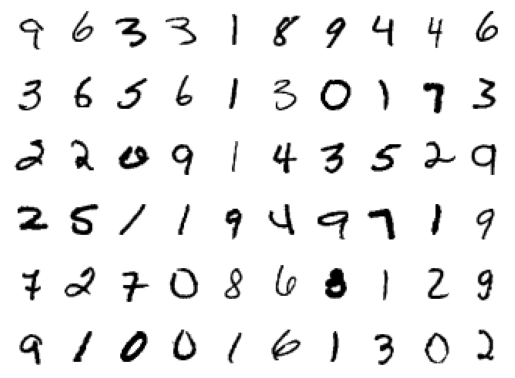

In [11]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

We will use a neural network with two hidden layers.  The first hidden layer has 128 neurons, the second layer has 64 neurons.

![https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [12]:
from torch import nn

In [13]:
input_size   = 784
hidden_sizes = [128, 64]
output_size  = 10

We create a fully connected feed-forward neural network and use the ReLU function as activation function for the hidden layers.  The outputlayer uses the
`LogSoftmax` function.

In [14]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [15]:
criterion = nn.NLLLoss()

In [16]:
help(nn.NLLLoss)

Help on class NLLLoss in module torch.nn.modules.loss:

class NLLLoss(_WeightedLoss)
 |  NLLLoss(weight: Optional[torch.Tensor] = None, size_average=None, ignore_index: int = -100, reduce=None, reduction: str = 'mean') -> None
 |  
 |  The negative log likelihood loss. It is useful to train a classification
 |  problem with `C` classes.
 |  
 |  If provided, the optional argument :attr:`weight` should be a 1D Tensor assigning
 |  weight to each of the classes. This is particularly useful when you have an
 |  unbalanced training set.
 |  
 |  The `input` given through a forward call is expected to contain
 |  log-probabilities of each class. `input` has to be a Tensor of size either
 |  :math:`(minibatch, C)` or :math:`(minibatch, C, d_1, d_2, ..., d_K)`
 |  with :math:`K \geq 1` for the `K`-dimensional case. The latter is useful for
 |  higher dimension inputs, such as computing NLL loss per-pixel for 2D images.
 |  
 |  Obtaining log-probabilities in a neural network is easily achieve

In [17]:
from torch import optim

### Core Training Of Neural Network

In [18]:
import time

In [24]:
%%time
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
start     = time.time()
epochs    = 30
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        #This is where the model learns by backpropagating
        loss.backward()
        #And optimizes its weights here
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Epoch {e:{2}d} - Training loss: {running_loss/len(trainloader)}")
stop = time.time()
print(f"\nTraining Time (in seconds) = {(stop-start)}")

Epoch  0 - Training loss: 0.0142945380320637
Epoch  1 - Training loss: 0.012945635691636365
Epoch  2 - Training loss: 0.012459227890512204
Epoch  3 - Training loss: 0.011104643817676771
Epoch  4 - Training loss: 0.01027472096445438
Epoch  5 - Training loss: 0.009349504358823727
Epoch  6 - Training loss: 0.008969130989999127
Epoch  7 - Training loss: 0.008408138036198824
Epoch  8 - Training loss: 0.007523231624062411
Epoch  9 - Training loss: 0.006654636282006838
Epoch 10 - Training loss: 0.006034040261561529
Epoch 11 - Training loss: 0.0055656438155355665
Epoch 12 - Training loss: 0.004958561907044184
Epoch 13 - Training loss: 0.004630384293821345
Epoch 14 - Training loss: 0.004304848677373671
Epoch 15 - Training loss: 0.0039028889000185456
Epoch 16 - Training loss: 0.003590758252375226
Epoch 17 - Training loss: 0.003342861735073888
Epoch 18 - Training loss: 0.003074193126544965
Epoch 19 - Training loss: 0.002811822484501099
Epoch 20 - Training loss: 0.002762447814066792
Epoch 21 - Tra

In [20]:
import numpy as np

In [21]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 4


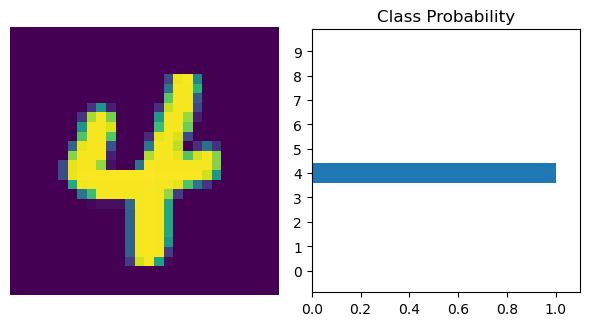

In [22]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [23]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        # Turn off gradients to speed up this part
        with torch.no_grad():
            logps = model(img)

        # Output of the network are log-probabilities, need to take exponential for probabilities
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if true_label == pred_label:
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9779
